In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
#creating a synthetic dataset
X, y = datasets.make_blobs(n_samples=100,n_features=2, centers=2, random_state=42, shuffle=1)

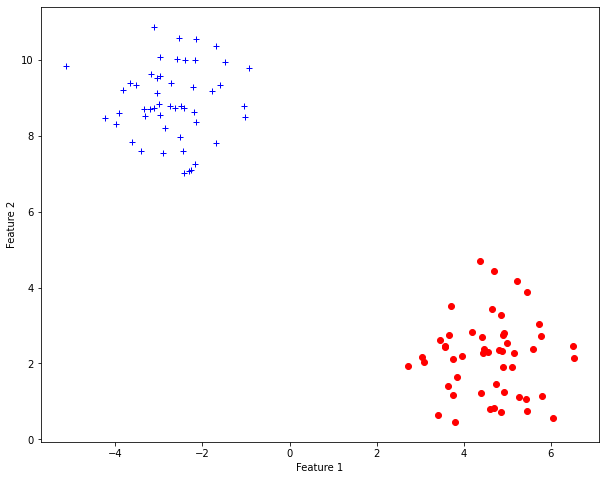

In [5]:
#visualizing
fig = plt.figure(figsize=(10,8))
plt.plot(X[:,0][y == 0], X[:, 1][y == 0], 'b+')
plt.plot(X[:,0][y == 1], X[:, 1][y == 1], 'ro')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [6]:
# creating the predict() function from scratch
def predict(X, weight):
    return np.where(np.dot(X, weight) > 0.0, 1, 0)

In [8]:
import numpy as np
# there are three weights, though the dataset still has two columns,so we
# will add a column to compensate for the bias, thus leading to a shape of 100x3
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
weight = np.random.random(X.shape[1]) # initializing the weights to random values

In [9]:
# After initialization, we will run an iterative process till a predetermined number of
# iterations (or epochs) and, within each iteration, process each point and update the
# weights

In [10]:
# Creating the fit method
def fit(X, y, niter=100, alpha=0.1):
    X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
    weight = np.random.random(X.shape[1])
    for i in range(niter):
        err = 0
        for xi, target in zip(X, y):
            weight += alpha * (target - predict(xi, weight)) * xi
    return weight

In [11]:
# Learning the weights
w = fit(X, y)

In [12]:
w

array([ 0.3543932 ,  0.6465271 ,  1.13757444, -0.26292998])

In [13]:
# picking random elements from X to compare how the perceptron labels them
random_elements = np.random.choice(X.shape[0], size=5, replace=False)
X_test = X[random_elements, :]

In [14]:
X_test

array([[ 1.        , -2.98837186,  8.82862715],
       [ 1.        ,  4.89037169,  2.31961789],
       [ 1.        ,  4.7395302 ,  1.46969403],
       [ 1.        , -2.26723535,  7.10100588],
       [ 1.        , -5.12894273,  9.83618863]])

In [15]:
# Adding an additional column with ones
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis = 1)

In [16]:
X_test

array([[ 1.        ,  1.        , -2.98837186,  8.82862715],
       [ 1.        ,  1.        ,  4.89037169,  2.31961789],
       [ 1.        ,  1.        ,  4.7395302 ,  1.46969403],
       [ 1.        ,  1.        , -2.26723535,  7.10100588],
       [ 1.        ,  1.        , -5.12894273,  9.83618863]])

In [17]:
# calling the predict method and compare the results with the actual values
print(predict(X_test, w))
print(y[random_elements])

[0 1 1 0 0]
[0 1 1 0 0]


In [18]:
'''The results look good because the dataset is too simple – however, remember that a
simple perceptron does not perform well in cases where decision boundaries are not so
clear. It is a good idea to combine such simple computation units to create a more
complex neural network.'''

'The results look good because the dataset is too simple – however, remember that a\nsimple perceptron does not perform well in cases where decision boundaries are not so\nclear. It is a good idea to combine such simple computation units to create a more\ncomplex neural network.'